In [31]:
import parselmouth

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display
from scipy.io import wavfile

Text(0, 0.5, 'amplitude')

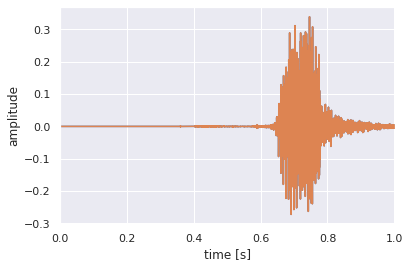

In [2]:
sns.set() # Use seaborn's default style to make attractive graphs

# Plot nice figures using Python's "standard" matplotlib library
snd = parselmouth.Sound("male_a_spa.wav")
plt.figure()
plt.plot(snd.xs(), snd.values.T)
plt.xlim([snd.xmin, snd.xmax])
plt.xlabel("time [s]")
plt.ylabel("amplitude")
# plt.show() # or plt.savefig("sound.png"), or plt.savefig("sound.pdf")

<ipython-input-3-8508beafa43e>:3: RuntimeWarning: divide by zero encountered in log10
  sg_db = 10 * np.log10(spectrogram.values)


(0.0, 1.0026875)

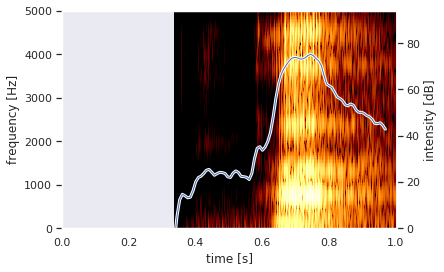

In [3]:
def draw_spectrogram(spectrogram, dynamic_range=70):
    X, Y = spectrogram.x_grid(), spectrogram.y_grid()
    sg_db = 10 * np.log10(spectrogram.values)
    plt.pcolormesh(X, Y, sg_db, vmin=sg_db.max() - dynamic_range, cmap='afmhot')
    plt.ylim([spectrogram.ymin, spectrogram.ymax])
    plt.xlabel("time [s]")
    plt.ylabel("frequency [Hz]")

def draw_intensity(intensity):
    plt.plot(intensity.xs(), intensity.values.T, linewidth=3, color='w')
    plt.plot(intensity.xs(), intensity.values.T, linewidth=1)
    plt.grid(False)
    plt.ylim(0)
    plt.ylabel("intensity [dB]")

intensity = snd.to_intensity()
spectrogram = snd.to_spectrogram()
plt.figure()
draw_spectrogram(spectrogram)
plt.twinx()
draw_intensity(intensity)
plt.xlim([snd.xmin, snd.xmax])

<ipython-input-3-8508beafa43e>:3: RuntimeWarning: divide by zero encountered in log10
  sg_db = 10 * np.log10(spectrogram.values)


(0.0, 1.0026875)

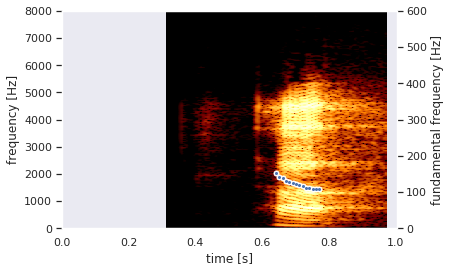

In [4]:
def draw_pitch(pitch):
    # Extract selected pitch contour, and
    # replace unvoiced samples by NaN to not plot
    pitch_values = pitch.selected_array['frequency']
    pitch_values[pitch_values==0] = np.nan
    plt.plot(pitch.xs(), pitch_values, 'o', markersize=5, color='w')
    plt.plot(pitch.xs(), pitch_values, 'o', markersize=2)
    plt.grid(False)
    plt.ylim(0, pitch.ceiling)
    plt.ylabel("fundamental frequency [Hz]")

pitch = snd.to_pitch()
# If desired, pre-emphasize the sound fragment before calculating the spectrogram
pre_emphasized_snd = snd.copy()
pre_emphasized_snd.pre_emphasize()
spectrogram = pre_emphasized_snd.to_spectrogram(window_length=0.03, maximum_frequency=8000)
plt.figure()
draw_spectrogram(spectrogram)
plt.twinx()
draw_pitch(pitch)
plt.xlim([snd.xmin, snd.xmax])

In [5]:
pitch

In [6]:
formants = snd.to_formant_burg()
formants.t_grid()


array([0.02321875, 0.02946875, 0.03571875, 0.04196875, 0.04821875,
       0.05446875, 0.06071875, 0.06696875, 0.07321875, 0.07946875,
       0.08571875, 0.09196875, 0.09821875, 0.10446875, 0.11071875,
       0.11696875, 0.12321875, 0.12946875, 0.13571875, 0.14196875,
       0.14821875, 0.15446875, 0.16071875, 0.16696875, 0.17321875,
       0.17946875, 0.18571875, 0.19196875, 0.19821875, 0.20446875,
       0.21071875, 0.21696875, 0.22321875, 0.22946875, 0.23571875,
       0.24196875, 0.24821875, 0.25446875, 0.26071875, 0.26696875,
       0.27321875, 0.27946875, 0.28571875, 0.29196875, 0.29821875,
       0.30446875, 0.31071875, 0.31696875, 0.32321875, 0.32946875,
       0.33571875, 0.34196875, 0.34821875, 0.35446875, 0.36071875,
       0.36696875, 0.37321875, 0.37946875, 0.38571875, 0.39196875,
       0.39821875, 0.40446875, 0.41071875, 0.41696875, 0.42321875,
       0.42946875, 0.43571875, 0.44196875, 0.44821875, 0.45446875,
       0.46071875, 0.46696875, 0.47321875, 0.47946875, 0.48571

In [12]:
formants.t_bins()

array([[0.02321875, 0.02946875],
       [0.02946875, 0.03571875],
       [0.03571875, 0.04196875],
       [0.04196875, 0.04821875],
       [0.04821875, 0.05446875],
       [0.05446875, 0.06071875],
       [0.06071875, 0.06696875],
       [0.06696875, 0.07321875],
       [0.07321875, 0.07946875],
       [0.07946875, 0.08571875],
       [0.08571875, 0.09196875],
       [0.09196875, 0.09821875],
       [0.09821875, 0.10446875],
       [0.10446875, 0.11071875],
       [0.11071875, 0.11696875],
       [0.11696875, 0.12321875],
       [0.12321875, 0.12946875],
       [0.12946875, 0.13571875],
       [0.13571875, 0.14196875],
       [0.14196875, 0.14821875],
       [0.14821875, 0.15446875],
       [0.15446875, 0.16071875],
       [0.16071875, 0.16696875],
       [0.16696875, 0.17321875],
       [0.17321875, 0.17946875],
       [0.17946875, 0.18571875],
       [0.18571875, 0.19196875],
       [0.19196875, 0.19821875],
       [0.19821875, 0.20446875],
       [0.20446875, 0.21071875],
       [0.

In [7]:
formants.get_number_of_frames()

153

In [8]:
formants.get_start_time()

0.0

In [9]:
formants.get_end_time()

1.0026875

In [10]:
formants.get_time_step()

0.00625

In [11]:
formants.get_total_duration()

1.0026875

In [19]:
formants.get_value_at_time(1,0)

nan

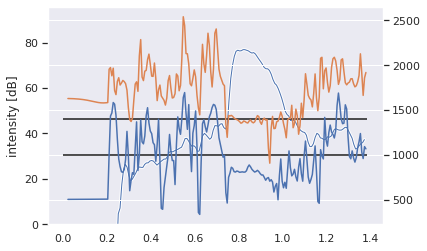

In [45]:
f1 = list()
f2 = list()
for t in formants.t_grid():
    f1.append(formants.get_value_at_time(1,t))
    f2.append(formants.get_value_at_time(2,t))
    
pre_emphasized_snd = snd.copy()
pre_emphasized_snd.pre_emphasize()
spectrogram = pre_emphasized_snd.to_spectrogram(window_length=0.03, maximum_frequency=8000)
plt.figure()
# draw_spectrogram(spectrogram)
intensity = snd.to_intensity()
draw_intensity(intensity)
plt.twinx()
plt.plot(formants.t_grid(), f1)
plt.hlines(1000, 0, formants.t_grid()[-1])
plt.plot(formants.t_grid(), f2)
plt.hlines(1400, 0, formants.t_grid()[-1])

In [34]:
frequency, wave = wavfile.read("male_a_spa.wav")
channel_1 = wave[:,0]
IPython.display.Audio(channel_1, rate=frequency)

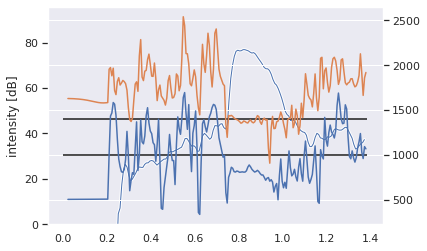

In [44]:
snd = parselmouth.Sound("male_a_spa_2.wav")
formants = snd.to_formant_burg()
f1 = list()
f2 = list()
for t in formants.t_grid():
    f1.append(formants.get_value_at_time(1,t))
    f2.append(formants.get_value_at_time(2,t))
    
pre_emphasized_snd = snd.copy()
pre_emphasized_snd.pre_emphasize()
spectrogram = pre_emphasized_snd.to_spectrogram(window_length=0.03, maximum_frequency=8000)
plt.figure()
# draw_spectrogram(spectrogram)
intensity = snd.to_intensity()
draw_intensity(intensity)
plt.twinx()
plt.plot(formants.t_grid(), f1)
plt.hlines(1000, 0, formants.t_grid()[-1])
plt.plot(formants.t_grid(), f2)
plt.hlines(1400, 0, formants.t_grid()[-1])

In [36]:
frequency, wave = wavfile.read("male_a_spa_2.wav")
# channel_1 = wave[:,0]
IPython.display.Audio(wave, rate=frequency)

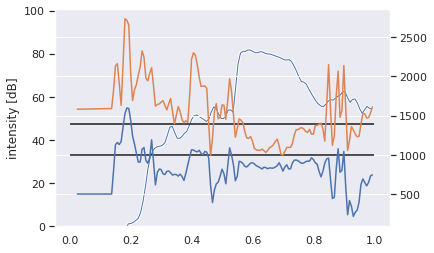

In [43]:
snd = parselmouth.Sound("female_a_spa.wav")
formants = snd.to_formant_burg()
f1 = list()
f2 = list()
for t in formants.t_grid():
    f1.append(formants.get_value_at_time(1,t))
    f2.append(formants.get_value_at_time(2,t))
    
pre_emphasized_snd = snd.copy()
pre_emphasized_snd.pre_emphasize()
spectrogram = pre_emphasized_snd.to_spectrogram(window_length=0.03, maximum_frequency=8000)
plt.figure()
# draw_spectrogram(spectrogram)
intensity = snd.to_intensity()
draw_intensity(intensity)
plt.twinx()
plt.plot(formants.t_grid(), f1)
plt.hlines(1000, 0, formants.t_grid()[-1])
plt.plot(formants.t_grid(), f2)
plt.hlines(1400, 0, formants.t_grid()[-1])

In [39]:
frequency, wave = wavfile.read("female_a_spa.wav")
# channel_1 = wave[:,0]
IPython.display.Audio(wave, rate=frequency)

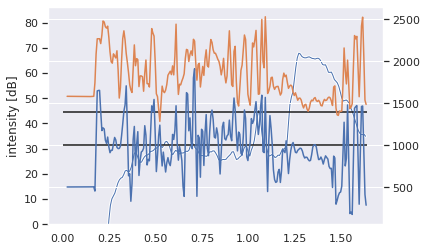

In [42]:
snd = parselmouth.Sound("female_a_spa_2.wav")
formants = snd.to_formant_burg()
f1 = list()
f2 = list()
for t in formants.t_grid():
    f1.append(formants.get_value_at_time(1,t))
    f2.append(formants.get_value_at_time(2,t))
    
pre_emphasized_snd = snd.copy()
pre_emphasized_snd.pre_emphasize()
spectrogram = pre_emphasized_snd.to_spectrogram(window_length=0.03, maximum_frequency=8000)
plt.figure()
# draw_spectrogram(spectrogram)
intensity = snd.to_intensity()
draw_intensity(intensity)
plt.twinx()
plt.plot(formants.t_grid(), f1)
plt.hlines(1000, 0, formants.t_grid()[-1])
plt.plot(formants.t_grid(), f2)
plt.hlines(1400, 0, formants.t_grid()[-1])

In [41]:
frequency, wave = wavfile.read("female_a_spa_2.wav")
# channel_1 = wave[:,0]
IPython.display.Audio(wave, rate=frequency)

|Vowel|First Formant|Second Formant|
|-|-|-|
|a|650|1300|
|e|450|1800|
|i|300|2200|
|o|450|1000|
|u|300|1000|